In [147]:
# EDA için kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

# Grafikleri göstermek için
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

# Makine öğrenmesi algoritmaları, veri ön işleme ve değerlendirme için sklearn kütüphanesi
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from yellowbrick.classifier import ClassPredictionError, ROCAUC

# Deep learning
import tensorflow as tf
from keras import models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


# Uyarılardan kurtulmak için
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [65]:
df = pd.read_csv('Churn_Modelling.csv')

In [66]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [67]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [69]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

# Dropping unnecessary columns

In [70]:
df.drop(columns=['CustomerId', 'RowNumber', 'Surname'], inplace=True)

In [71]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (10000, 11)
___________________________
Data Types:
int64      7
float64    2
object     2
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Age,int64,10000,70,0,18,92
Balance,float64,10000,6382,0,0.0,250898.09
CreditScore,int64,10000,460,0,350,850
EstimatedSalary,float64,10000,9999,0,11.58,199992.48
Exited,int64,10000,2,0,0,1
Gender,object,10000,2,0,Female,Male
Geography,object,10000,3,0,France,Spain
HasCrCard,int64,10000,2,0,0,1
IsActiveMember,int64,10000,2,0,0,1
NumOfProducts,int64,10000,4,0,1,4


In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [73]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [74]:
duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


In [75]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number'] > 0]

In [76]:
missing_values(df)

,Missing_Number,Missing_Percent


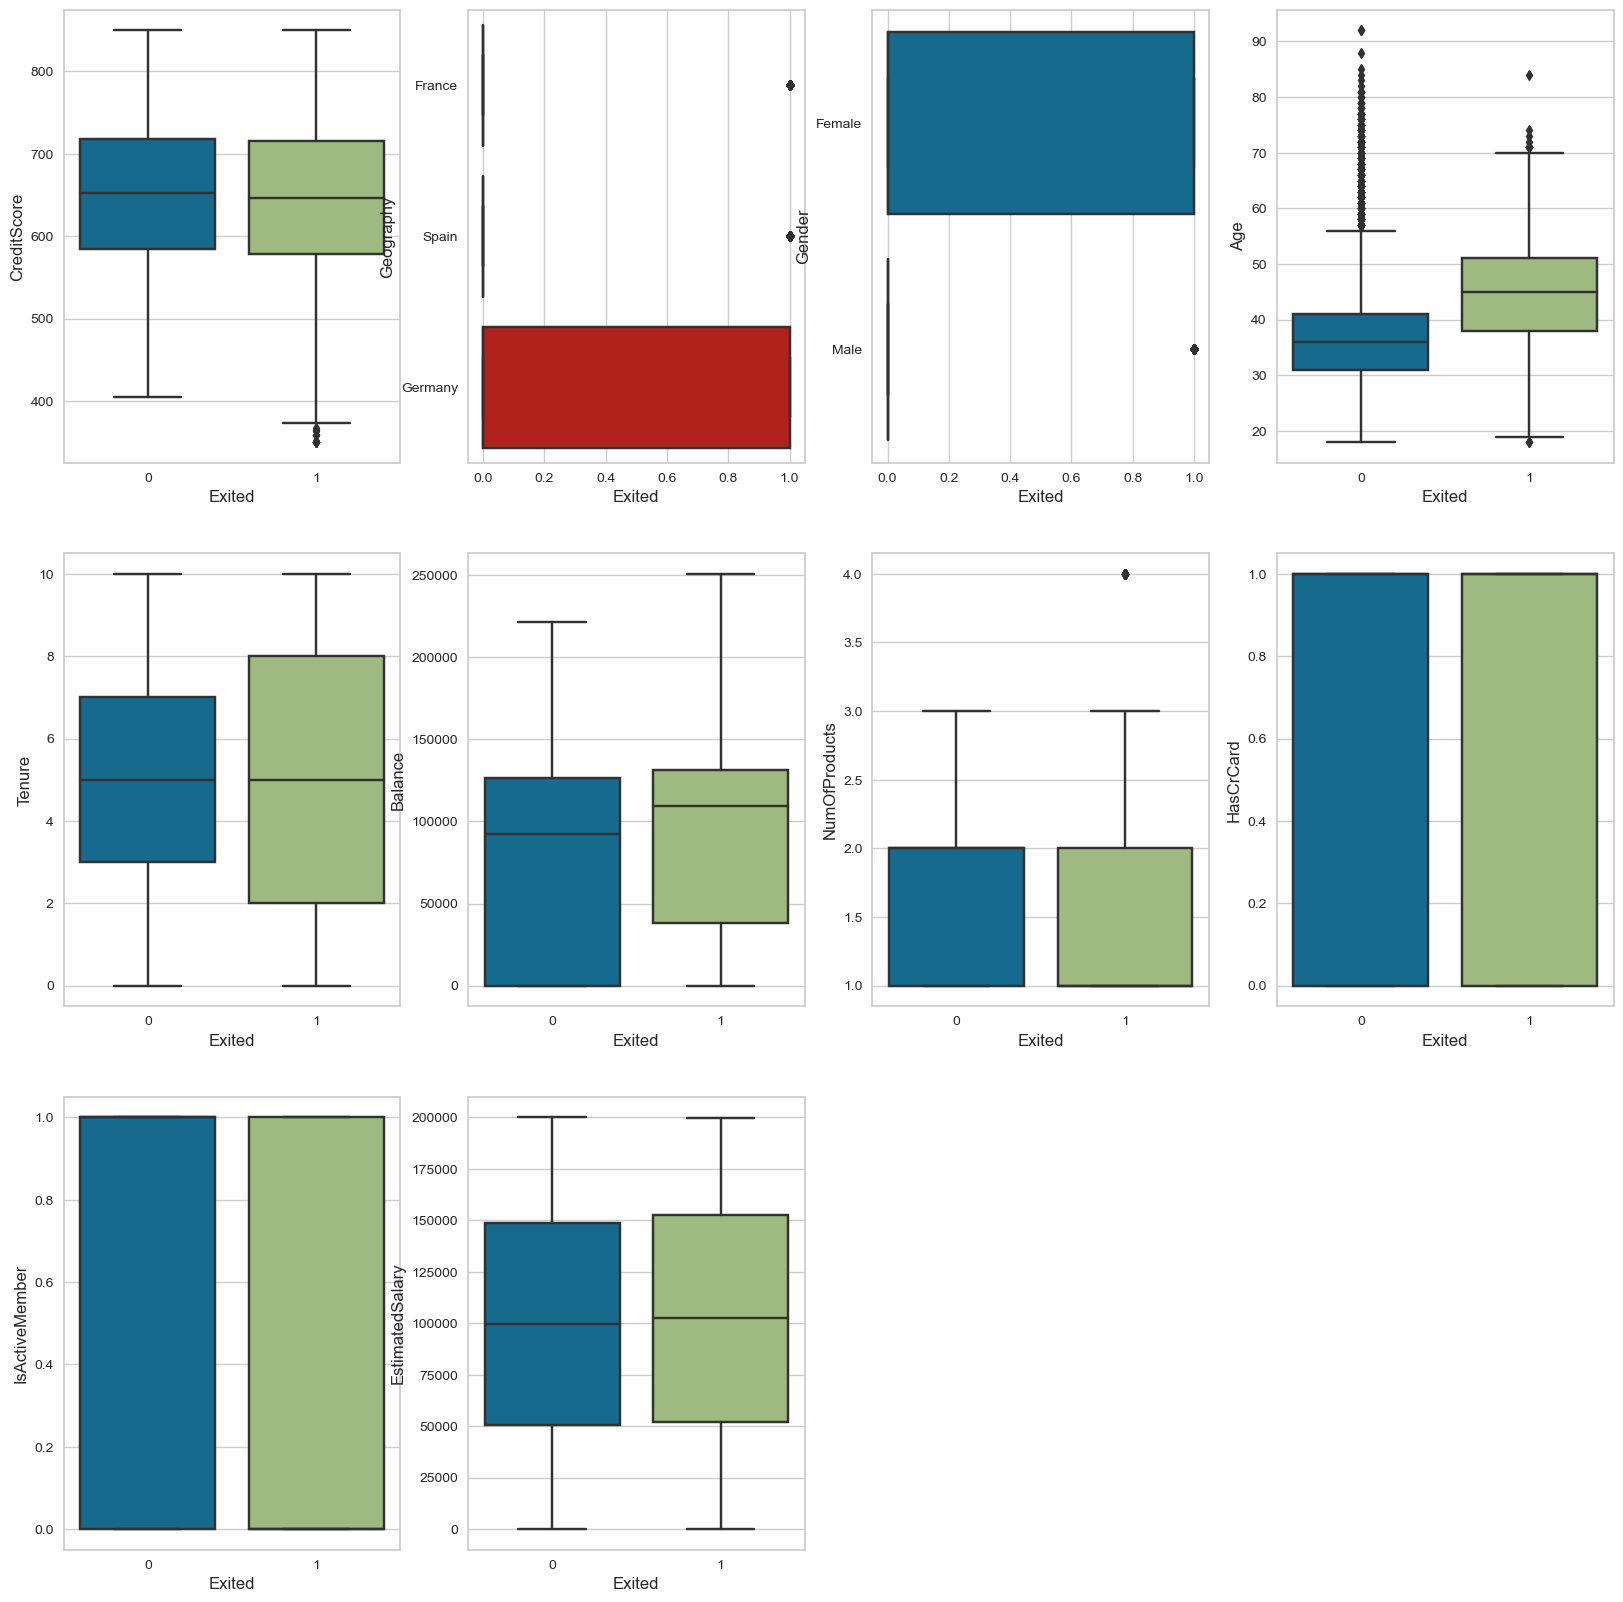

In [77]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Exited":
        index += 1
        plt.subplot(3,4,index)
        sns.boxplot(x='Exited',y=feature,data=df)
plt.show()

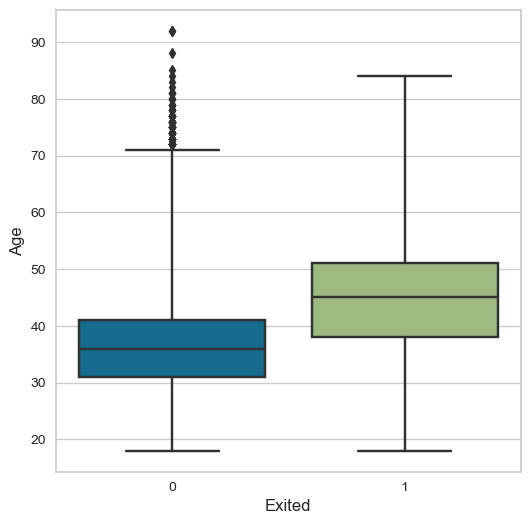

In [78]:
plt.figure(figsize=(6,6))
sns.boxplot(x= df.Exited,y=df.Age,data=df, whis = 3)
plt.show();

In [79]:
df[(df['Age'] >= 72) & (df['Exited'] == 1)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1410,523,France,Female,73,7,0.00,2,0,0,130883.90,1
3110,546,Germany,Female,74,8,114888.74,2,1,1,66732.63,1
3531,408,France,Female,84,8,87873.39,1,0,0,188484.52,1
9555,782,Germany,Female,72,5,148666.99,1,1,0,2605.65,1


In [80]:
df[(df['Age'] >= 72) & (df['Exited'] == 0)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
85,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
158,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
230,673,France,Male,72,1,0.00,2,0,1,111981.19,0
252,681,France,Female,79,0,0.00,2,0,1,170968.99,0
310,652,France,Female,80,4,0.00,2,1,1,188603.07,0
...,...,...,...,...,...,...,...,...,...,...,...
9587,719,Germany,Female,76,10,95052.29,1,1,0,176244.87,0
9671,649,Germany,Male,78,4,68345.86,2,1,1,142566.75,0
9736,659,Spain,Male,78,2,151675.65,1,0,1,49978.67,0
9894,521,France,Female,77,6,0.00,2,1,1,49054.10,0


## Except only 4 people, senior people who is 72 or older don't cancel their membership. 
## So to increase recall value to determine Exited = 1 values who exits from the system, dropping people over 72 from 0 class could help to learn 1 class better, it should be tried for modeling.

In [81]:
df = df[df.Age < 72]

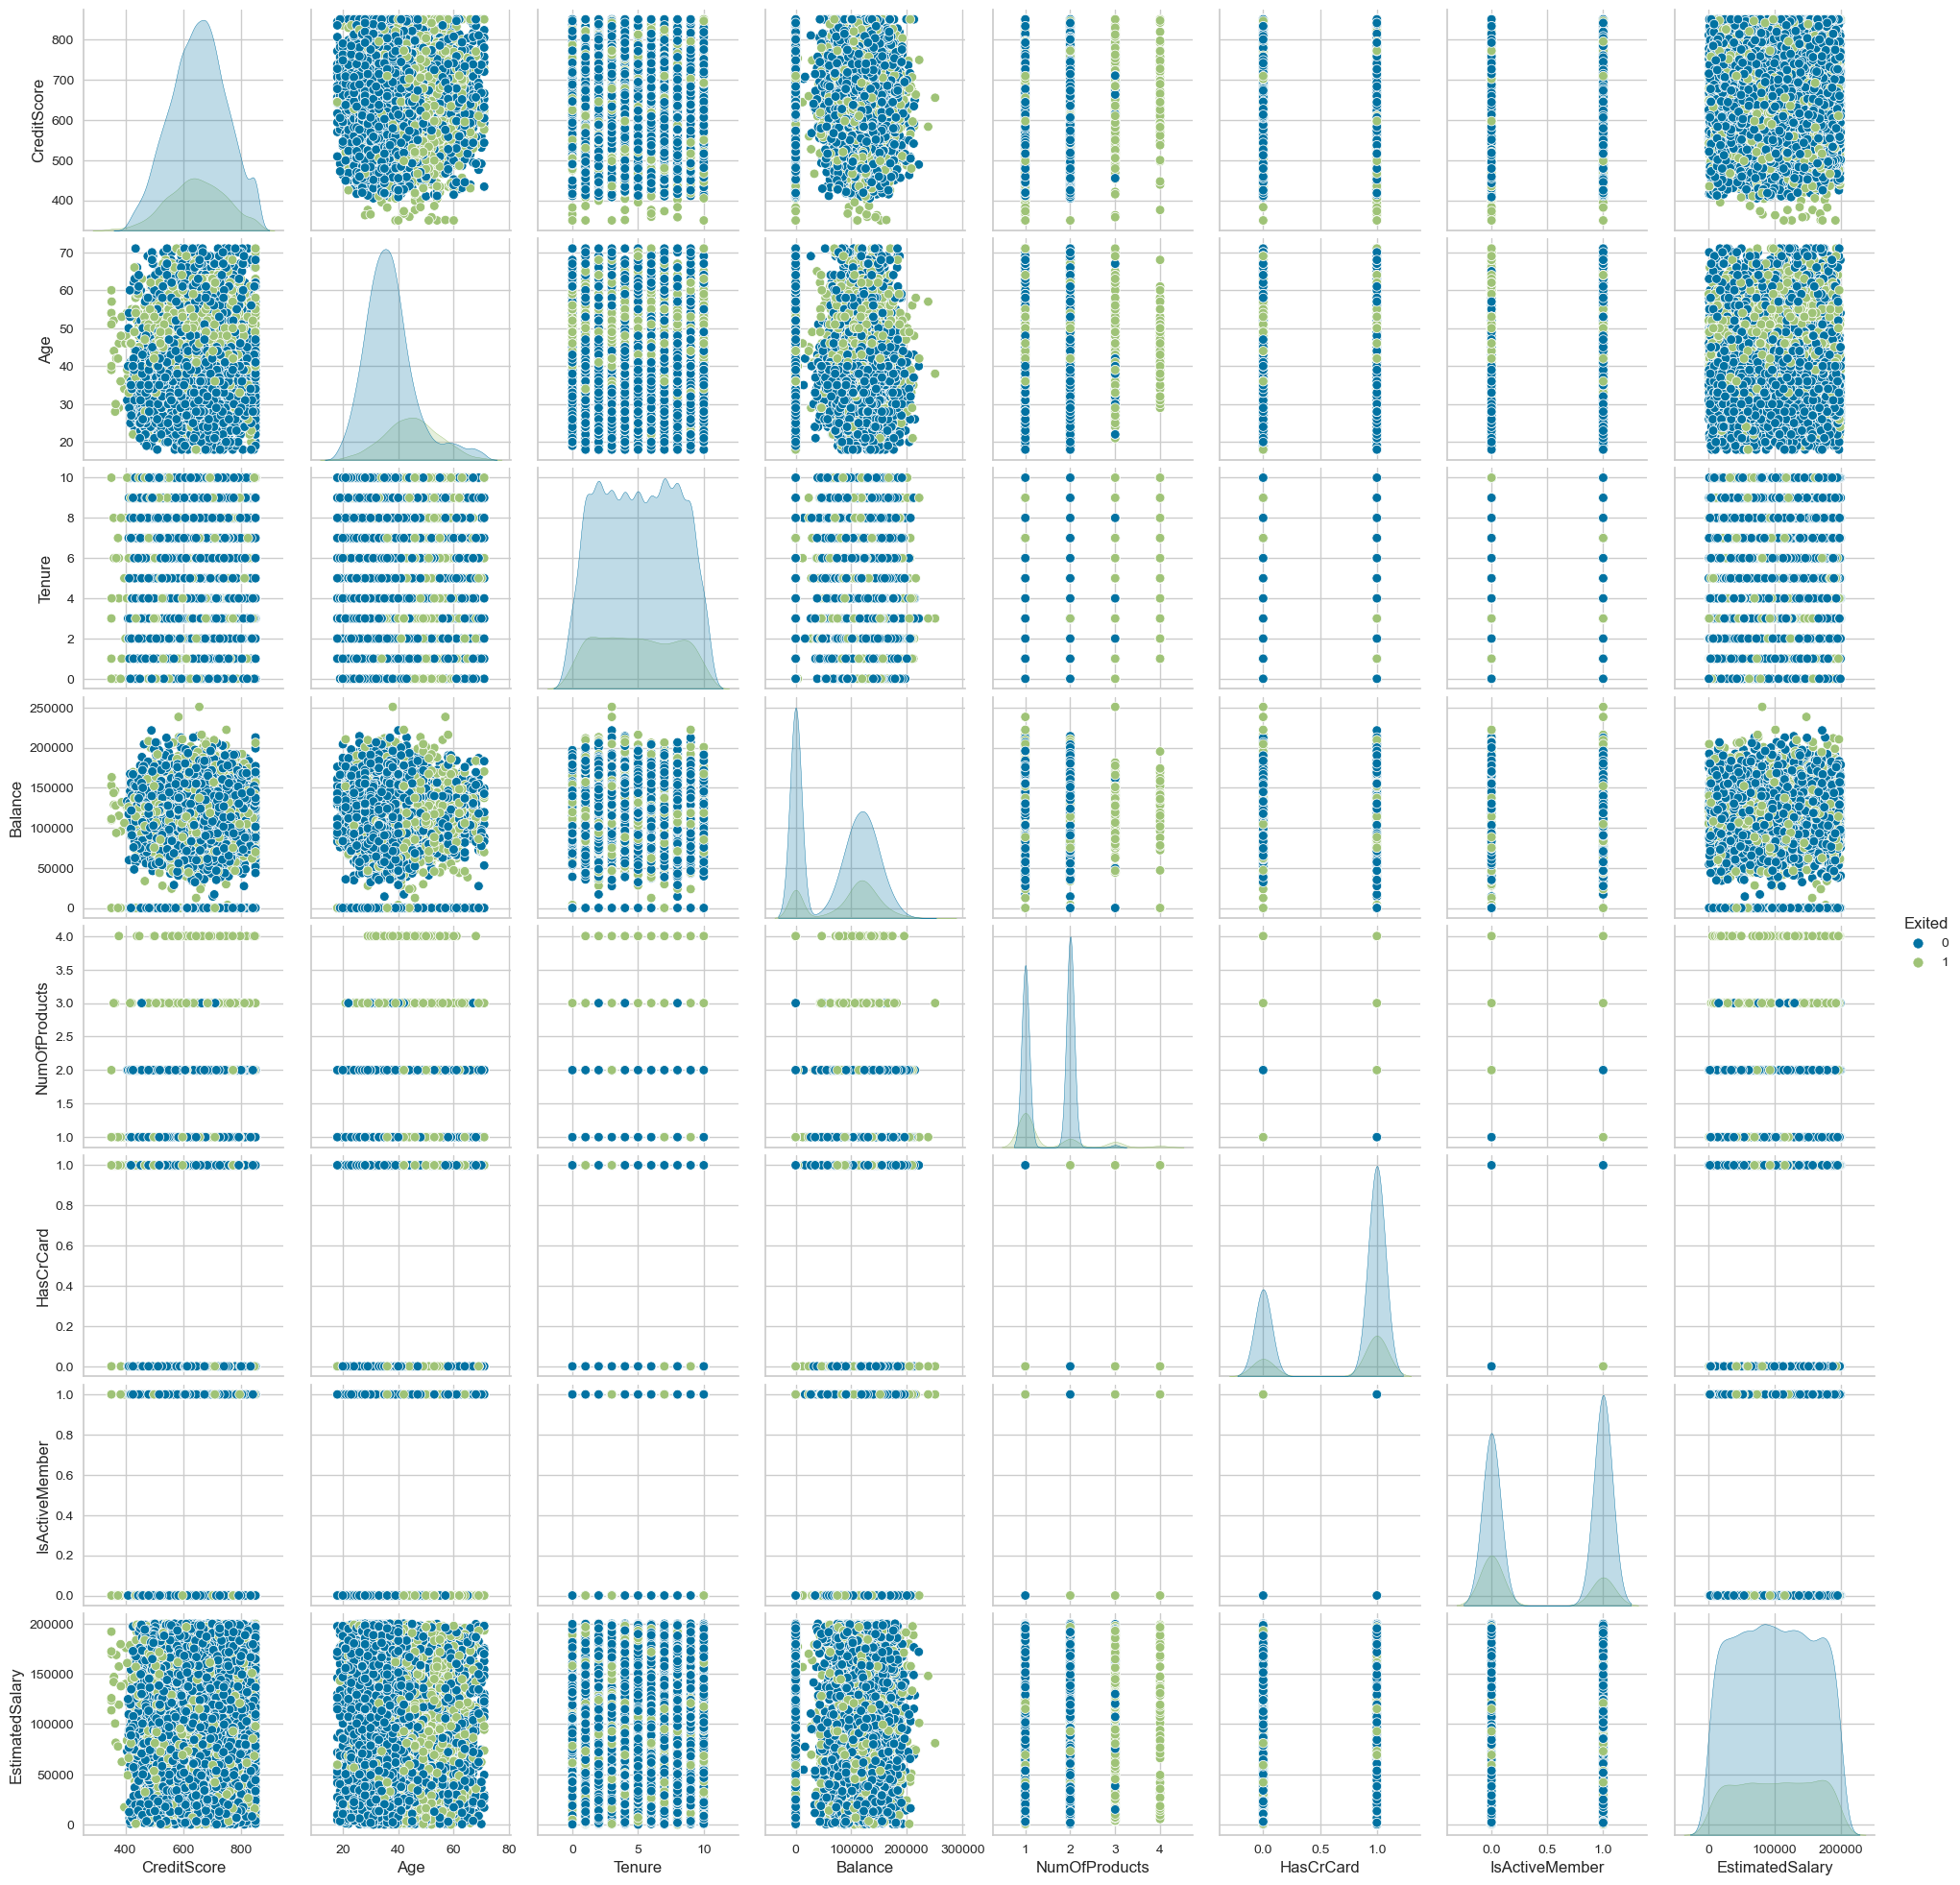

In [82]:
sns.pairplot(data=df, hue='Exited')

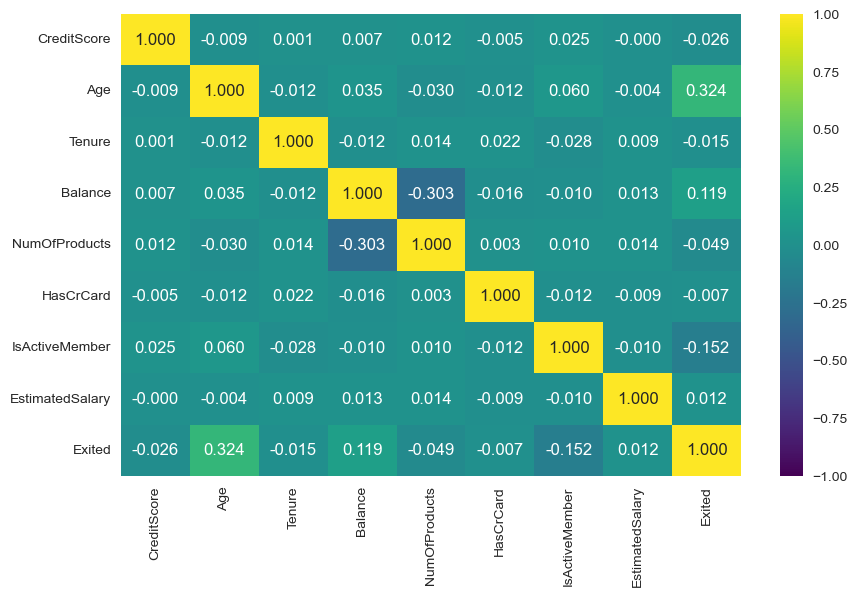

In [83]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(),vmin=-1,vmax=1, annot=True, fmt='.3f', cmap='viridis');

# Train - Test split

In [84]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [85]:
df.Exited.value_counts(normalize=True)

0    0.794522
1    0.205478
Name: Exited, dtype: float64

# Encoding

In [86]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [87]:
cat = X.select_dtypes("object").columns
cat

Index(['Geography', 'Gender'], dtype='object')

In [88]:
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


In [89]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10
5,645,2.0,1.0,44,8,113755.78,2,1,0,149756.71
6,822,0.0,1.0,50,7,0.00,2,1,1,10062.80
7,376,1.0,0.0,29,4,115046.74,4,1,0,119346.88
8,501,0.0,1.0,44,4,142051.07,2,0,1,74940.50
9,684,0.0,1.0,27,2,134603.88,1,1,1,71725.73


### Geograph => France = '0', Germany = '1', Spain = '2'
### Gender => Female = '0', Male = '1'

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101) # stratify = y is used when data is unbalanced

# XGboosting method

In [91]:
from xgboost import XGBClassifier

In [92]:
X.select_dtypes("object").columns

Index([], dtype='object')

In [93]:
xgb = XGBClassifier(random_state=101).fit(X_train, y_train)

In [94]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [95]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[1482   90]
 [ 223  184]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1572
           1       0.67      0.45      0.54       407

    accuracy                           0.84      1979
   macro avg       0.77      0.70      0.72      1979
weighted avg       0.83      0.84      0.83      1979


Train_Set
[[6255   34]
 [ 315 1311]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6289
           1       0.97      0.81      0.88      1626

    accuracy                           0.96      7915
   macro avg       0.96      0.90      0.93      7915
weighted avg       0.96      0.96      0.95      7915



In [96]:
param_grid = {"n_estimators":[50, 100, 200, 300],'max_depth':[2,3,4,5], "learning_rate": [0.01, 0.05, 0.1, 0.2],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5, 0.7, 1]}

In [97]:
xgb_model = XGBClassifier(random_state=101)

In [98]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "recall", verbose=2, n_jobs = -1, cv = 10).fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


In [99]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 300,
 'subsample': 0.8}

In [100]:
xgb_grid.best_score_

0.5073884723168977

In [101]:
y_pred = xgb_grid.predict(X_test)

xgb_recall = recall_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[1487   85]
 [ 219  188]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1572
           1       0.69      0.46      0.55       407

    accuracy                           0.85      1979
   macro avg       0.78      0.70      0.73      1979
weighted avg       0.83      0.85      0.83      1979


Train_Set
[[6271   18]
 [ 200 1426]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6289
           1       0.99      0.88      0.93      1626

    accuracy                           0.97      7915
   macro avg       0.98      0.94      0.96      7915
weighted avg       0.97      0.97      0.97      7915



# Random forest classifier method

In [102]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [103]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[1502   70]
 [ 228  179]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1572
           1       0.72      0.44      0.55       407

    accuracy                           0.85      1979
   macro avg       0.79      0.70      0.73      1979
weighted avg       0.84      0.85      0.83      1979


Train_Set
[[6289    0]
 [   0 1626]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6289
           1       1.00      1.00      1.00      1626

    accuracy                           1.00      7915
   macro avg       1.00      1.00      1.00      7915
weighted avg       1.00      1.00      1.00      7915



In [104]:
param_grid = {'n_estimators':[50, 64, 100, 128, 300],     #64 ve 128 skorlarina mutlaka bakilmasi gerektigini belirtmistik.
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [105]:
model = RandomForestClassifier(random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [106]:
rf_grid_model.best_params_

{'max_depth': 9, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 50}

In [107]:
rf_grid_model.best_score_

0.4403567720622935

In [108]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[1520   52]
 [ 236  171]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1572
           1       0.77      0.42      0.54       407

    accuracy                           0.85      1979
   macro avg       0.82      0.69      0.73      1979
weighted avg       0.85      0.85      0.84      1979


Train_Set
[[6217   72]
 [ 757  869]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      6289
           1       0.92      0.53      0.68      1626

    accuracy                           0.90      7915
   macro avg       0.91      0.76      0.81      7915
weighted avg       0.90      0.90      0.88      7915



# Logistic Regression

In [109]:
operations = [("scaler",StandardScaler()),("logistic", LogisticRegression())]

log_pipe = Pipeline(steps=operations)

log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [110]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[1512   60]
 [ 321   86]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1572
           1       0.59      0.21      0.31       407

    accuracy                           0.81      1979
   macro avg       0.71      0.59      0.60      1979
weighted avg       0.78      0.81      0.77      1979


Train_Set
[[6063  226]
 [1253  373]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6289
           1       0.62      0.23      0.34      1626

    accuracy                           0.81      7915
   macro avg       0.73      0.60      0.61      7915
weighted avg       0.79      0.81      0.78      7915



In [111]:
log_model = LogisticRegression(random_state=101)

In [112]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type (L1 or L2)
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear'],  # Solver for logistic regression
    'max_iter': [20, 30,50, 100, 200, 300],  # Maximum number of iterations
    }

In [113]:
grid_search = GridSearchCV(estimator=log_model, param_grid= param_grid,  
                           scoring='recall', cv=10)  

In [114]:
log_grid = grid_search.fit(X_train, y_train)

In [115]:
log_grid.best_params_

{'C': 100, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}

In [116]:
log_grid.best_score_

0.2263273498447323

In [117]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[1512   60]
 [ 321   86]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1572
           1       0.59      0.21      0.31       407

    accuracy                           0.81      1979
   macro avg       0.71      0.59      0.60      1979
weighted avg       0.78      0.81      0.77      1979


Train_Set
[[6063  226]
 [1253  373]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6289
           1       0.62      0.23      0.34      1626

    accuracy                           0.81      7915
   macro avg       0.73      0.60      0.61      7915
weighted avg       0.79      0.81      0.78      7915



# ANN modeling

In [118]:
import tensorflow as tf
from keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [119]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

![Alt text](image.png)

In [120]:
seed = 101

In [208]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [218]:
from keras.metrics import Recall
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Flatten

tf.random.set_seed(seed) 

model = Sequential()

model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization()) 
model.add(Dropout(0.3))

model.add(Dense(64, activation = 'relu')) 
model.add(BatchNormalization())

model.add(Dense(32, activation = 'relu')) 
model.add(Dense(16, activation = 'relu')) 
model.add(Dense(units=1, activation='sigmoid'))  

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt,                          
              loss = 'binary_crossentropy', # Targette yer alan degisken kategorikten numerike donusturulmusse "sparse" eklemek gerekiyor.
              metrics = [Recall()]) 

model.fit(x = X_train, y = y_train, validation_data=(X_test, y_test), callbacks=[early_stop],  batch_size = 32, epochs = 300, verbose=1)

Epoch 1/300
248/248 [==============================] - 3s 4ms/step - loss: 0.4486 - recall_8: 0.2153 - val_loss: 0.3966 - val_recall_8: 0.3710
Epoch 2/300
248/248 [==============================] - 1s 3ms/step - loss: 0.3829 - recall_8: 0.3899 - val_loss: 0.3624 - val_recall_8: 0.3857
Epoch 3/300
248/248 [==============================] - 1s 3ms/step - loss: 0.3644 - recall_8: 0.4237 - val_loss: 0.3568 - val_recall_8: 0.4054
Epoch 4/300
248/248 [==============================] - 1s 3ms/step - loss: 0.3570 - recall_8: 0.4330 - val_loss: 0.3584 - val_recall_8: 0.4029
Epoch 5/300
248/248 [==============================] - 1s 3ms/step - loss: 0.3543 - recall_8: 0.4311 - val_loss: 0.3553 - val_recall_8: 0.4373
Epoch 6/300
248/248 [==============================] - 1s 3ms/step - loss: 0.3492 - recall_8: 0.4422 - val_loss: 0.3593 - val_recall_8: 0.4840
Epoch 7/300
248/248 [==============================] - 1s 3ms/step - loss: 0.3503 - recall_8: 0.4545 - val_loss: 0.3581 - val_recall_8: 0.5061

In [219]:
model.summary() # her katmanda kaç parametre olduğunu verir 

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               1408      
                                                                 
 batch_normalization_21 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_22 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_42 (Dense)            (None, 32)               

<Axes: >

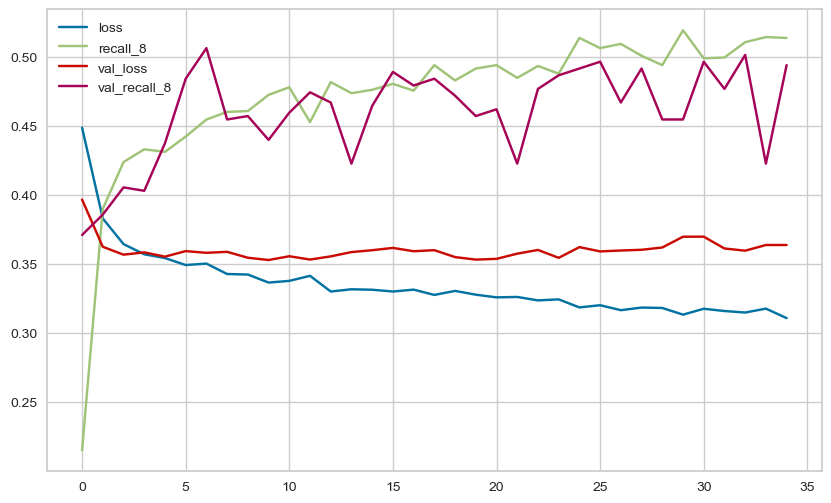

In [220]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## Threshold value can be changed depends on the problem, data set and customer's request.
## If threshold value lowered to 0.3 from 0.5 recall value increases, however false positive rates also increases, which means precision value gets lower.

In [221]:
y_train_pred = model.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

y_test_pred = model.predict(X_test)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

62/62 [==============================] - 0s 1ms/step


In [222]:
from sklearn.metrics import classification_report, confusion_matrix

# Eval Metrics fot Test; 

print(confusion_matrix(y_test, y_test_pred_binary)) 
print(classification_report(y_test, y_test_pred_binary))

[[1464  108]
 [ 206  201]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1572
           1       0.65      0.49      0.56       407

    accuracy                           0.84      1979
   macro avg       0.76      0.71      0.73      1979
weighted avg       0.83      0.84      0.83      1979



In [223]:
from sklearn.metrics import classification_report, confusion_matrix

# Eval Metrics fot Train; 

print(confusion_matrix(y_train, y_train_pred_binary)) 
print(classification_report(y_train, y_train_pred_binary))

[[6048  241]
 [ 625 1001]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      6289
           1       0.81      0.62      0.70      1626

    accuracy                           0.89      7915
   macro avg       0.86      0.79      0.82      7915
weighted avg       0.89      0.89      0.88      7915



In [224]:
y_train_pred = model.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.3).astype(int)

y_test_pred = model.predict(X_test)
y_test_pred_binary = (y_test_pred > 0.3).astype(int)

 35/248 [===>..........................] - ETA: 0s

62/62 [==============================] - 0s 1ms/step


In [225]:
# Eval Metrics fot Test; 

print(confusion_matrix(y_test, y_test_pred_binary)) 
print(classification_report(y_test, y_test_pred_binary))

[[1306  266]
 [ 137  270]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1572
           1       0.50      0.66      0.57       407

    accuracy                           0.80      1979
   macro avg       0.70      0.75      0.72      1979
weighted avg       0.82      0.80      0.81      1979



In [226]:
from sklearn.metrics import classification_report, confusion_matrix

# Eval Metrics fot Train; 

print(confusion_matrix(y_train, y_train_pred_binary)) 
print(classification_report(y_train, y_train_pred_binary))

[[5499  790]
 [ 352 1274]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      6289
           1       0.62      0.78      0.69      1626

    accuracy                           0.86      7915
   macro avg       0.78      0.83      0.80      7915
weighted avg       0.87      0.86      0.86      7915



In [168]:
model.save('churn_ann_4.h5')  # creates a HDF5 file 'my_model.h5'

## If recall value is very important and if low precision value won't be big problem. Threshold value could be lowererd to increase recall value.
## Otherwise, data collecting, remodelling, specific feature engineering such as, finding individual values in data set to use in model, like using same age gap for 0 and 1 classes, which is the most important feature for this project with this data set. And higher age values is in favor of not canceling membership already. Those values could be seperated and remodel.. etc